In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_excel('C:\\Users\\shira\\Desktop\\Safr Care\\NPI listing\\NPI - NEMT\\MASTER FILE - NEMT.xlsx', engine='openpyxl')
data.head()

,CELL PHONE NUMBER,PLAIN TEXT VERSION - CELLPHONE NUMBERS,PHONE_COMPANY,PHONE_LOCATION,BUSINESS NAME,CITY,STATE
0,(903) 617-8027,9036178027,T-MOBILE,"TYLER, TX",1 ACCESS CARE OF AMERICA,TYLER,TX
1,(281) 772-4187,2817724187,T-MOBILE,"HOUSTON, TX",1 BREEZE TRANSPORTATION LLC,HOUSTON,TX
2,(503) 481-8673,5034818673,T-MOBILE,"PORTLAND, OR",1 CARE TRANSIT LLP,PORTLAND,OR
3,(773) 418-3572,7734183572,T-MOBILE,"CHICAGO, IL",1 CARE TRANSPORTATION,CHICAGO,IL
4,(720) 299-0922,7202990922,VERIZON WIRELESS,"DENVER, CO",1 DF TRANSPORT LLC,DENVER,CO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20284 entries, 0 to 20283
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   CELL PHONE NUMBER                       20284 non-null  object
 1   PLAIN TEXT VERSION - CELLPHONE NUMBERS  20284 non-null  int64 
 2   PHONE_COMPANY                           20284 non-null  object
 3   PHONE_LOCATION                          20284 non-null  object
 4   BUSINESS NAME                           18786 non-null  object
 5   CITY                                    20284 non-null  object
 6   STATE                                   20284 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


In [4]:
data.describe()

,PLAIN TEXT VERSION - CELLPHONE NUMBERS
count,2.028400e+04
mean,5.803072e+09
std,2.348799e+09
min,2.012334e+09
25%,3.375245e+09
50%,6.063053e+09
75%,7.863522e+09
max,9.899719e+09


In [5]:
data.shape

(20284, 7)

In [6]:
data.describe()

,PLAIN TEXT VERSION - CELLPHONE NUMBERS
count,2.028400e+04
mean,5.803072e+09
std,2.348799e+09
min,2.012334e+09
25%,3.375245e+09
50%,6.063053e+09
75%,7.863522e+09
max,9.899719e+09


In [7]:
data.isnull().sum()

CELL PHONE NUMBER                            0
PLAIN TEXT VERSION - CELLPHONE NUMBERS       0
PHONE_COMPANY                                0
PHONE_LOCATION                               0
BUSINESS NAME                             1498
CITY                                         0
STATE                                        0
dtype: int64

In [8]:
data['BUSINESS NAME']

0           1 ACCESS CARE OF AMERICA
1        1 BREEZE TRANSPORTATION LLC
2                 1 CARE TRANSIT LLP
3              1 CARE TRANSPORTATION
4                 1 DF TRANSPORT LLC
                    ...             
20279                            NaN
20280                            NaN
20281                            NaN
20282                            NaN
20283                            NaN
Name: BUSINESS NAME, Length: 20284, dtype: object

In [9]:
data = data.dropna(subset=['BUSINESS NAME'])

In [10]:
data.isnull().sum()

CELL PHONE NUMBER                         0
PLAIN TEXT VERSION - CELLPHONE NUMBERS    0
PHONE_COMPANY                             0
PHONE_LOCATION                            0
BUSINESS NAME                             0
CITY                                      0
STATE                                     0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18786 entries, 0 to 18834
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   CELL PHONE NUMBER                       18786 non-null  object
 1   PLAIN TEXT VERSION - CELLPHONE NUMBERS  18786 non-null  int64 
 2   PHONE_COMPANY                           18786 non-null  object
 3   PHONE_LOCATION                          18786 non-null  object
 4   BUSINESS NAME                           18786 non-null  object
 5   CITY                                    18786 non-null  object
 6   STATE                                   18786 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


Visualizations

In [12]:
State = data["STATE"].value_counts()
print(State)

STATE
CA    2039
OH    1654
TX    1618
LA    1380
VA    1309
FL    1224
NY     805
NC     758
GA     729
TN     642
IL     625
AZ     596
MN     585
CO     567
MI     549
WI     448
NJ     333
IN     281
MS     240
MA     224
MD     218
PA     206
SC     185
MO     167
PR     111
DC     108
AL     108
AR     104
IA      87
KS      85
ID      69
KY      67
NV      65
WA      62
OR      61
HI      56
NM      56
CT      49
RI      47
NE      44
OK      35
DE      28
NH      28
ME      23
UT      21
ND      17
WV      17
SD      16
AK      16
MT       7
VI       6
WY       5
GU       3
VT       2
BC       1
Name: count, dtype: int64


<Axes: xlabel='STATE'>

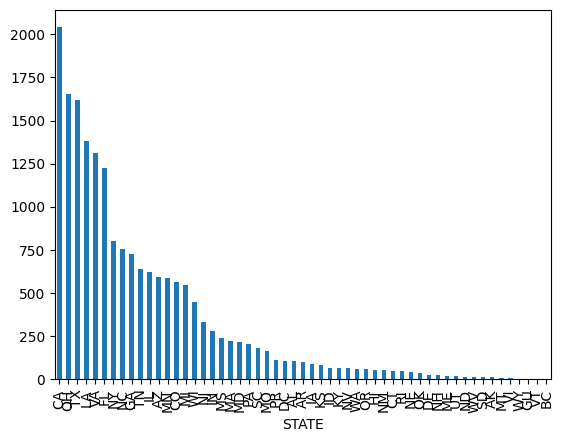

In [13]:
State.plot(kind='bar')

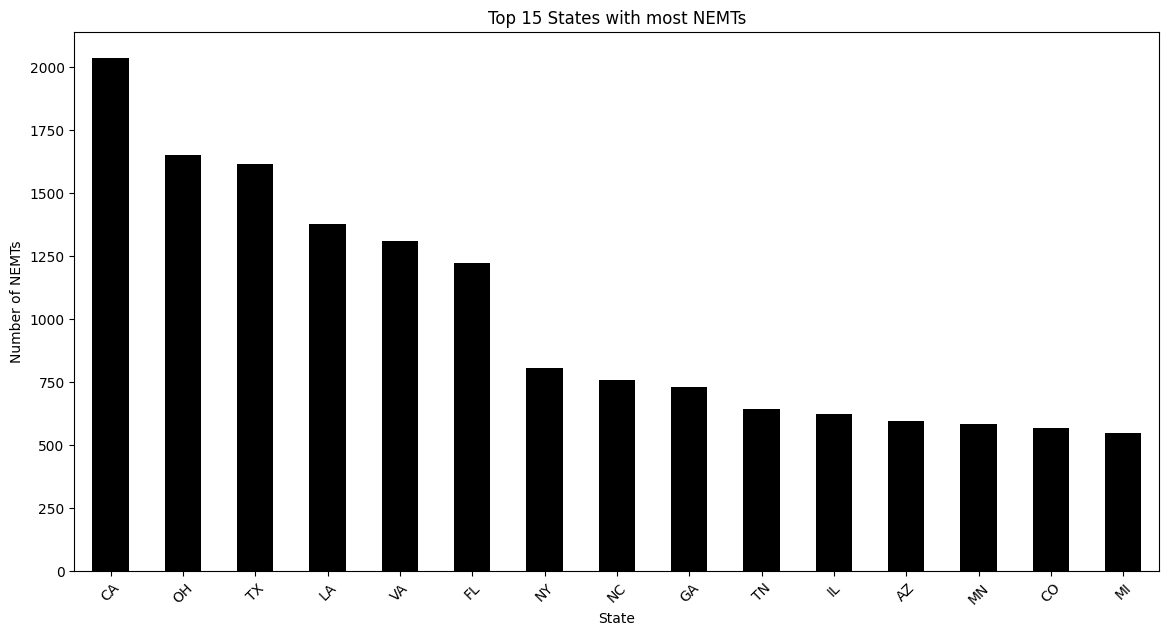

In [14]:
# Count the number of NEMTs by state
state_counts = data['STATE'].value_counts()

# Plot the top 15 states with the NEMTs
plt.figure(figsize=(14, 7))
state_counts.head(15).plot(kind='bar', color='black')
plt.title('Top 15 States with most NEMTs')
plt.xlabel('State')
plt.ylabel('Number of NEMTs')
plt.xticks(rotation=45)
plt.show()

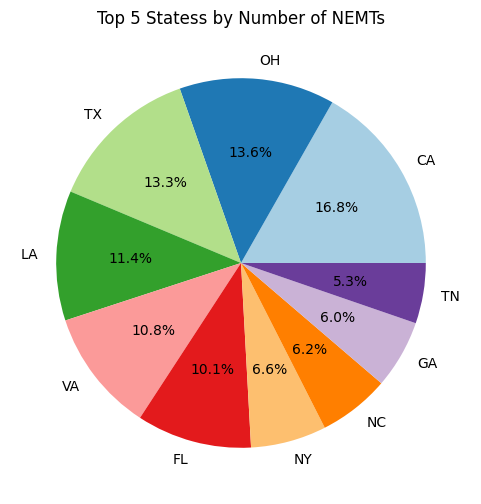

In [17]:
# Count the number of NEMTs by state
state_counts = data['STATE'].value_counts()

# Plot the top 10 States with the most NEMTs as a pie chart
plt.figure(figsize=(6, 6))
state_counts.head(10).plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Top 10 Statess by Number of NEMTs')
plt.ylabel('')  # Remove the y-label for aesthetics
plt.show()

In [18]:
data.to_csv('Cleaned_Main_File.csv')